In [1]:
import math
from datetime import timedelta, datetime
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from scipy.io import savemat

import os
# from salishsea_tools import nc_tools, places

import cmocean.cm as cm
import copy


In [8]:
Ionax = 445
Ionay = 302

S4x = 446
S4y = 301

bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
print (bathy.nav_lat[S4x, S4y].values, bathy.nav_lon[S4x, S4y].values)
print (bathy.nav_lat[S4x, S4y].values, bathy.nav_lon[S4x, S4y].values)
ioutfall, joutfall = S4x, S4y
print (bathy.Bathymetry[ioutfall, joutfall].values)
mesh = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
print (mesh.mbathy[0, ioutfall, joutfall].values)
print (mesh.gdepw_0[0, 26, ioutfall, joutfall].values)

cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

49.19330596923828 -123.32088470458984
49.19330596923828 -123.32088470458984
145.1875
29
86.96747


In [3]:
bottom_depth = mesh.gdepw_0[0, 26, ioutfall, joutfall].values

In [2]:
# data = xr.open_dataset("/ocean/gwatts/home/analysis-grace/runs/depDays/passive_particles_for_1-8-2024_run_30_days_1.0.zarr")
# data = xr.open_dataset("/ocean/gwatts/home/analysis-grace/runs/config_test/passive_particles_for_1-4-2024_run_5_days_1.0.zarr")
data = xr.open_dataset('/ocean/gwatts/home/analysis-grace/runs/hourlyhourly/passive_particles_for_1-5-2024_run_39_days_NG160m.zarr')
nobs = data.obs.shape[0]
ntraj = data.trajectory.shape[0]
print (nobs, ntraj)

618 936


In [4]:
max(45, 1)

45

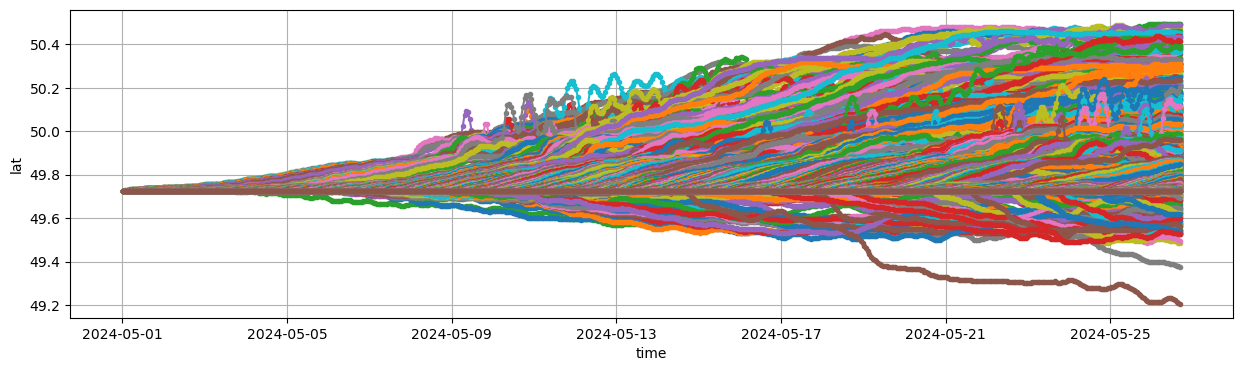

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.lat[ii, :tend]
    x = data.time[ii, :tend]
    ax.plot(x, y, '.-')
ax.set_ylabel('lat')
ax.set_xlabel('time')
ax.grid();

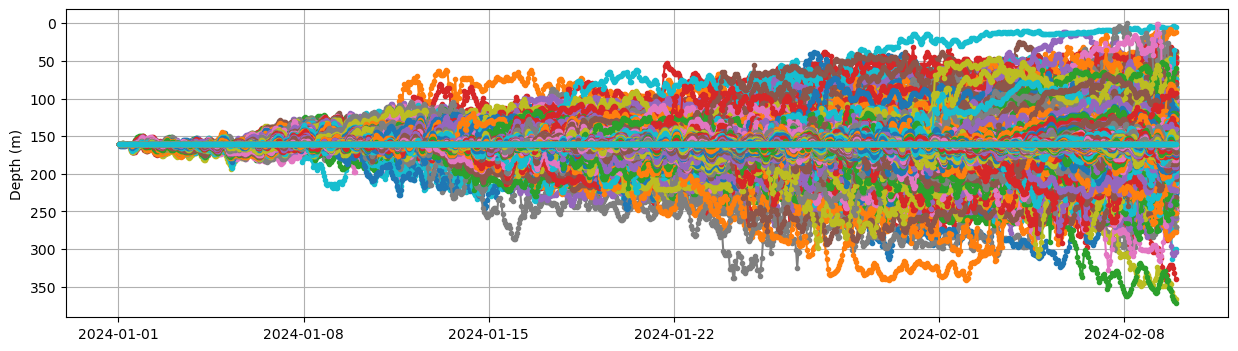

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.z[ii, :tend]
    x = data.time[ii, :tend]
    ax.plot(x, y, '.-')
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.grid();

/tmp/ipykernel_2931045/1847075243.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


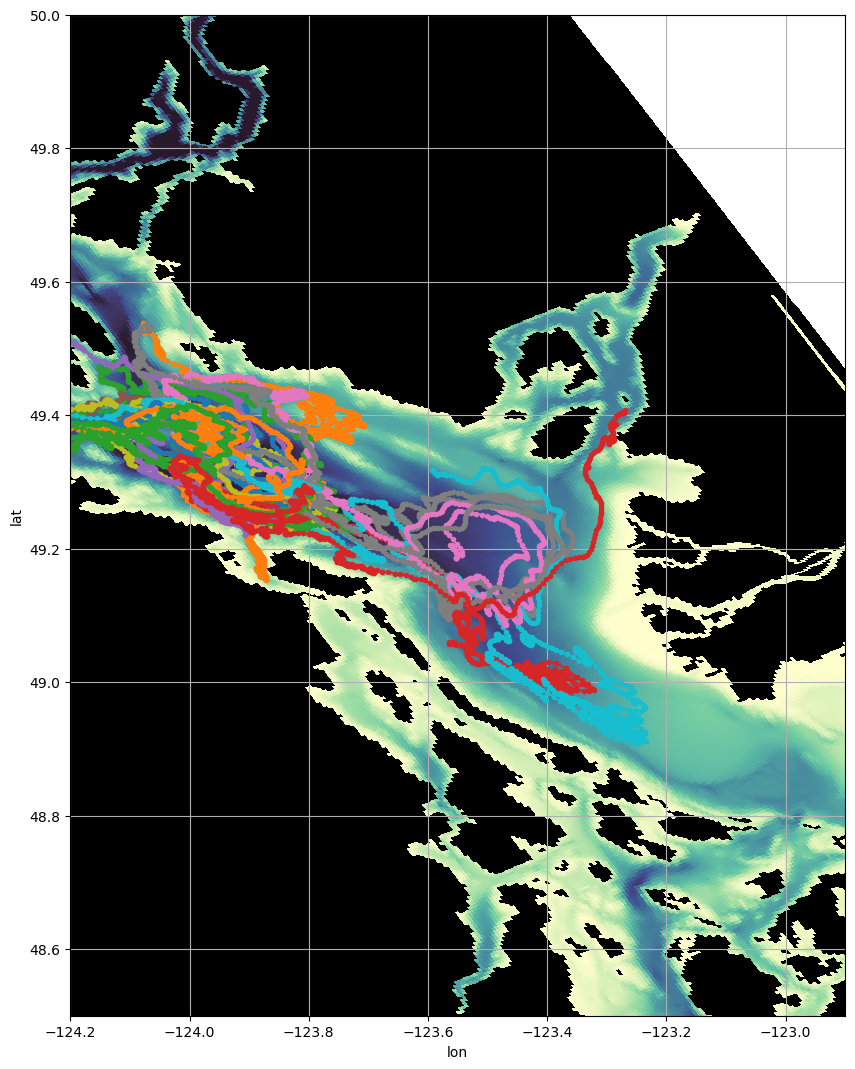

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 13))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
ax.set_xlim(-124.2, -122.9)
ax.set_ylim(48.5, 50);
# 
# for ii in range(ntraj):
for ii in range(24):
    y = data.lat[ii]
    x = data.lon[ii]
    ax.plot(x, y, '.-')
# ax.plot(data.lat[0,0], data.lon[0,0], 'o')
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.grid();

In [4]:
d = [50., 70., 100., 130., 160.]
np.repeat(d, 30/len(d))

array([ 50.,  50.,  50.,  50.,  50.,  50.,  70.,  70.,  70.,  70.,  70.,
        70., 100., 100., 100., 100., 100., 100., 130., 130., 130., 130.,
       130., 130., 160., 160., 160., 160., 160., 160.])

/ocean/gwatts/home/analysis-grace/runs/tidal_runs/passive_particles_for_20-1-2025_run_7_days_130m.zarr


In [5]:
import numpy as np

release_particles_every = 86400  # seconds
ndays = 4
particles_per_group = 10

total_particles = int(ndays * 86400 / release_particles_every)
number_particles = total_particles * particles_per_group  # now total number of particles

# Create time vector where each group of 10 particles shares the same release time
group_times = np.arange(0, release_particles_every * total_particles, release_particles_every)
times = np.repeat(group_times, particles_per_group)

print(number_particles)
print(group_times)
print(times)

40
[     0  86400 172800 259200]
[     0      0      0      0      0      0      0      0      0      0
  86400  86400  86400  86400  86400  86400  86400  86400  86400  86400
 172800 172800 172800 172800 172800 172800 172800 172800 172800 172800
 259200 259200 259200 259200 259200 259200 259200 259200 259200 259200]


In [6]:
lat = -123*np.ones(number_particles)

print(lat)

[-123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123.
 -123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123.
 -123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123.
 -123. -123. -123. -123.]
